#Objectives

I was hired to predict the clients that have certain tendencies relating their retention to the company, or the clients that leave our company services.


In [19]:
import pandas as pd

In [2]:
data = pd.read_csv('/content/Customer-Churn.csv')
data.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [15]:
rep_dict = {'Sim':1, 'Nao':0}
data_mod = data[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']].replace(rep_dict)
dummie_data = pd.get_dummies(data.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))
data_final = pd.concat([data_mod, dummie_data], axis=1)

In [18]:
pd.set_option('display.max_columns', 39)
data_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_0,VariasLinhasTelefonicas_1,VariasLinhasTelefonicas_SemServicoTelefonico,ServicoDeInternet_0,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,SegurancaOnline_0,SegurancaOnline_1,SegurancaOnline_SemServicoDeInternet,BackupOnline_0,BackupOnline_1,BackupOnline_SemServicoDeInternet,SeguroNoDispositivo_0,SeguroNoDispositivo_1,SeguroNoDispositivo_SemServicoDeInternet,SuporteTecnico_0,SuporteTecnico_1,SuporteTecnico_SemServicoDeInternet,TVaCabo_0,TVaCabo_1,TVaCabo_SemServicoDeInternet,StreamingDeFilmes_0,StreamingDeFilmes_1,StreamingDeFilmes_SemServicoDeInternet,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,0,1,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0


## Predicting a new clients behavior

In [20]:
new_client = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]
#consider the new client as X, what is its behavior (Y)?

In [21]:
X = data_final.drop('Churn', axis=1)
Y = data_final['Churn']

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
new_client_scale= scaler.transform(pd.DataFrame(new_client, columns = X.columns))

array([[-0.96662231, -0.65401193,  0.32743831,  0.8297975 , -0.43991649,
        -1.31816495, -0.82630172,  1.03806605, -0.85417615, -0.32743831,
        -0.52592737,  1.38171215, -0.88565976,  1.00669571, -0.63393298,
        -0.52592737, -0.88361972, -0.72556272,  1.90140322,  1.12942721,
         1.38127743, -0.52592737, -0.98632101,  1.56387171, -0.52592737,
         1.2273572 , -0.79013171, -0.52592737, -0.80874158, -0.79607014,
         1.90140322, -0.56297505, -1.1059698 ,  1.94458183, -0.52504733,
        -0.71102597, -0.54480692,  1.88720123]])

##Using KNN

Things to take care:

High values of k = Overfitting

Small values of k = Underfitting

When using supervised learning, one must take care with the inputs of the algorithm. Overfitting will be perfect to the x_train values, when something new comes around it will be not classified, even it fits the train data requiremetns. Underfitting will create errors based on including others on the group that they do not belong.

In [29]:
import numpy as np

In [31]:
a = new_client_scale
b = X_scale[0] #using the data of client 0 from the dataset

Using KNN equation and numpy we can calculate the euclidian distance between client 0 and the new client.

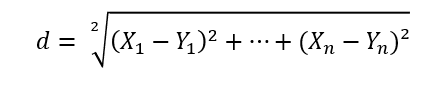

In [37]:
print(f'The new_client distante from Client 0 is {np.sqrt(np.sum(np.square(a-b)))}')

The new_client distante from Client 0 is 9.224124747811146


In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, Y, test_size=0.3, random_state=123)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_train, Y_train)
knn_prediction = knn.predict(X_test)

array([1, 0, 0, ..., 0, 0, 0])

## Using Naive Bayes

Based on the equation bellow, Naive Bayes returns the probability of certain classification, based on the X(A) and Y(B) entryies.


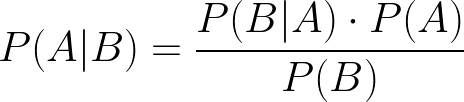

In [47]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB(binarize=abs(np.median(X_train))) #threshold based the median of the X_train
bnb.fit(X_train, Y_train)
bnb_predictions = bnb.predict(X_test)
bnb_predictions

array([1, 0, 0, ..., 0, 1, 0])

## Using the decision tree

From root (lesser impure and with best attributes data), to branches (decision nodes, based on the best way to divide the data), to leaf (final decision, or classifier). The decision tree needs homogeneity in the data, so normalization is not required. It can work with all types of data, but overfitting (a very big tree) is a common mistake made by the use of this model. This model can also be highly unstable, in other words, any treatment or new data added, changes the decision tree to a completely new one.
To create each decision, the tree can use criteria like the Gini index, which determines the heterogeneity of the data. Higher values mean higher heterogeneity and impurity.


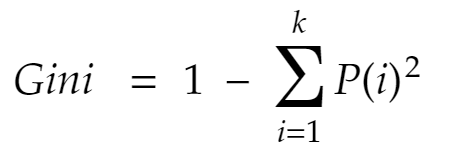


Another criterion used is entropy. This calculation is based on the disorder of the data, based on a classificatory variable. Like the Gini Index, entropy returns the impurity and heterogeneity of the data.

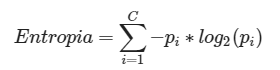

In [51]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(X_train, Y_train)
dtc_pred = dtc.predict(X_test)
dtc_pred

array([1, 0, 0, ..., 1, 0, 0])

#Validation

In [60]:
from sklearn.metrics import confusion_matrix
print(f' KNN\n{confusion_matrix(Y_test, knn_prediction)}\n\n NB\n{confusion_matrix(Y_test, bnb_predictions)}\n\nDecisionTree\n{confusion_matrix(Y_test, dtc_pred)}')

 KNN
[[1305  218]
 [ 317  273]]

 NB
[[1059  464]
 [ 120  470]]

DecisionTree
[[1246  277]
 [ 285  305]]


##Accuracy

In [61]:
from sklearn.metrics import accuracy_score

In [62]:
print(f' KNN\n{accuracy_score(Y_test, knn_prediction)}\n\n NB\n{accuracy_score(Y_test, bnb_predictions)}\n\nDecisionTree\n{accuracy_score(Y_test, dtc_pred)}')

 KNN
0.7468054898248935

 NB
0.7236157122574538

DecisionTree
0.7340274491244676


All models had similar ACC, but the best one is knn to predict the Churn feature and the clients behavior. This metric is based on the less mistakes made by the models. In other words it measures if the models have less false positives or false negatives.

## Precision

This metric is related to the true negative and true positives predicitions of the models.

In [64]:
from sklearn.metrics import precision_score
print(f' KNN\n{precision_score(Y_test, knn_prediction)}\n\n NB\n{precision_score(Y_test, bnb_predictions)}\n\nDecisionTree\n{precision_score(Y_test, dtc_pred)}')

 KNN
0.5560081466395111

 NB
0.5032119914346895

DecisionTree
0.5240549828178694


As it was to KNN ACC, precision scores for KNN are better.

## Recall

This metric is related to the true positive values and the false negative values. It will return a value that states the sensibility of the model in relation to the prediction of true positive results.

In [66]:
from sklearn.metrics import recall_score
print(f' KNN\n{recall_score(Y_test, knn_prediction)}\n\n NB\n{recall_score(Y_test, bnb_predictions)}\n\nDecisionTree\n{recall_score(Y_test, dtc_pred)}')

 KNN
0.46271186440677964

 NB
0.7966101694915254

DecisionTree
0.5169491525423728


This time, NB was the better one for true positive values.

## F1 Score

This score is based on the transformation of precision and recall values.

In [74]:
F1_KNN = 2* (precision_score(Y_test, knn_prediction)*recall_score(Y_test, knn_prediction))/(precision_score(Y_test, knn_prediction) + recall_score(Y_test, knn_prediction))

In [75]:
F1_NB = 2* (precision_score(Y_test, bnb_predictions)*recall_score(Y_test, bnb_predictions))/(precision_score(Y_test, bnb_predictions) + recall_score(Y_test, bnb_predictions))

In [76]:
F1_DTC = 2* (precision_score(Y_test, dtc_pred)*recall_score(Y_test, dtc_pred))/(precision_score(Y_test, dtc_pred) + recall_score(Y_test, dtc_pred))

In [77]:
print(f'F1 for KNN was={F1_KNN}\nF1 for NB was={F1_NB}\nF1 for DTC was={F1_DTC}')

F1 for KNN was=0.5050878815911193
F1 for NB was=0.6167979002624673
F1 for DTC was=0.5204778156996587


Based on the F1 scores, all models have a balance between recall and precision, but NB is the best since it has higher precision than the other models.

## Selecting the best model

Returning to our goal. What is the best model that can classify our clients? We will select now the best model for that.

Based on the precision metric, KNN is the best model.

Remember that this selection must be based on the data that you are using.

In [79]:
print(f' KNN\n{precision_score(Y_test, knn_prediction)}\n\n NB\n{precision_score(Y_test, bnb_predictions)}\n\nDecisionTree\n{precision_score(Y_test, dtc_pred)}')

 KNN
0.5560081466395111

 NB
0.5032119914346895

DecisionTree
0.5240549828178694
